# Histogram and Scatterplots

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir = "Data"):
    """Return CSV path with given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    """Read stock data (adjusted close) for given symbols from CSV files."""
    if 'SPY' not in symbols:
        """add SPY for reference"""
        symbols.insert(0, 'SPY') 
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = "Date", 
                          parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        df_temp.rename(columns={'Adj Close': symbol}, inplace=True)
        """column name must be unique"""
        df = df.join(df_temp)
        df = df.dropna()
    
    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def cal_daily_returns(df):
    daily_returns = (df/df.shift(1))-1
    daily_returns.iloc[0,:]=0
    return daily_returns
    
def test_run():
    # Define a date range
    sd,ed = '2020-01-30', '2020-07-30'
    dates = pd.date_range('2020-01-30', '2020-07-30')

    # Choose stock symbols to read
    symbols = ['AAPL', 'MFT', 'TSLA', 'GOOG']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Slice and plot
    ax = df['SPY'].plot(title = "SPY rolling mean", label = 'SPY')
    
    rm_SPY = df['SPY'].rolling(window=20).mean()
    rm_SPY.plot(label="Rolling Mean",ax=ax)
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc = 'upper left')
    plt.show()
    #define the window is 20 days so the first 20 days value are empty
    
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df = normalize_data(df)
    plot_data(df.loc[start_index:end_index, columns])

def normalize_data(df):
    """Normalize stock prices using the first row of the dataframe."""
    return df / df.iloc[0, :]


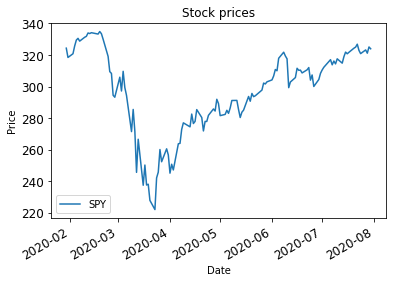

,SPY
2020-01-30,0.000000
2020-01-31,-0.018158
2020-02-03,0.007429
2020-02-04,0.015241
2020-02-05,0.011548
...,...
2020-07-24,-0.006440
2020-07-27,0.007292
2020-07-28,-0.006342
2020-07-29,0.012299


In [15]:
sd,ed = '2020-01-30', '2020-07-30'
dates = pd.date_range('2020-01-30', '2020-07-30')

# Choose stock symbols to read
symbols = []

# Get stock data
df = get_data(symbols, dates)
df.head()
plot_data(df)
daily_returns = cal_daily_returns(df)
daily_returns

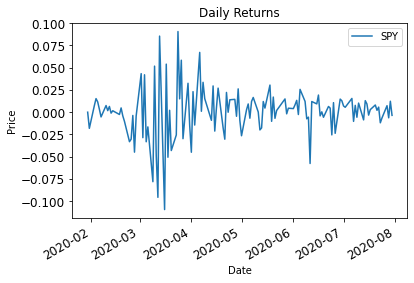

In [16]:
plot_data(daily_returns, title="Daily Returns")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113da6710>]],
      dtype=object)

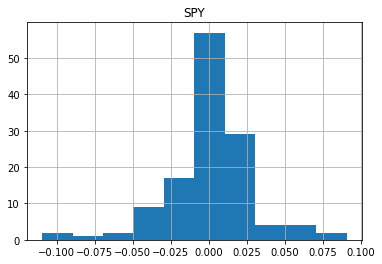

In [17]:
daily_returns.hist()


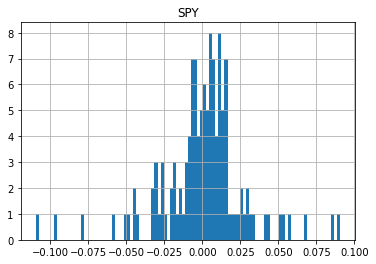

In [20]:
daily_returns.hist(bins = 100)
plt.show()

In [23]:
mean = daily_returns['SPY'].mean()
mean

0.00038271684121354274

In [24]:
std = daily_returns['SPY'].std()
std

0.027967823956608583

In [ ]:
daily